# Sonar dataset - Survival Prediction

The Sonar dataset provides observations for each signal sent out by a metal cylender thier outcome. The problem statement entails predicting whether at obstacle ahead is a Minr or a Rock given various features.

### About the data

- Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time. The integration aperture for higher frequencies occur later in time, since these frequencies are transmitted later during the chirp.


- The label associated with each record contains the letter "R" if the object is a rock and "M" if it is a mine (metal cylinder). The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.

In [1]:
import pandas as pd
import numpy as np


df = pd.read_csv(r'C:\Users\User\Desktop\Projects\sonar.csv')
df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [2]:
df.tail()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M
206,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M


In [3]:
df.shape

(207, 61)

In [4]:
df.columns

Index(['0.0200', '0.0371', '0.0428', '0.0207', '0.0954', '0.0986', '0.1539',
       '0.1601', '0.3109', '0.2111', '0.1609', '0.1582', '0.2238', '0.0645',
       '0.0660', '0.2273', '0.3100', '0.2999', '0.5078', '0.4797', '0.5783',
       '0.5071', '0.4328', '0.5550', '0.6711', '0.6415', '0.7104', '0.8080',
       '0.6791', '0.3857', '0.1307', '0.2604', '0.5121', '0.7547', '0.8537',
       '0.8507', '0.6692', '0.6097', '0.4943', '0.2744', '0.0510', '0.2834',
       '0.2825', '0.4256', '0.2641', '0.1386', '0.1051', '0.1343', '0.0383',
       '0.0324', '0.0232', '0.0027', '0.0065', '0.0159', '0.0072', '0.0167',
       '0.0180', '0.0084', '0.0090', '0.0032', 'R'],
      dtype='object')

In [5]:
df.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [6]:
df.describe(include=['O'])

,R
count,207
unique,2
top,M
freq,111


## EDA

### Target Variable

In [7]:
df.R.value_counts()

M    111
R     96
Name: R, dtype: int64

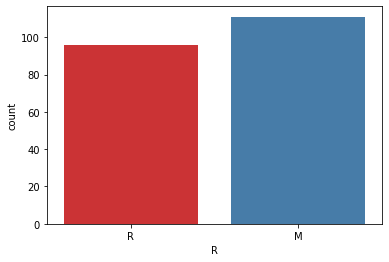

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='R', palette='Set1')

In [9]:
df.R.unique()

array(['R', 'M'], dtype=object)

### Vzualizing the independent variables

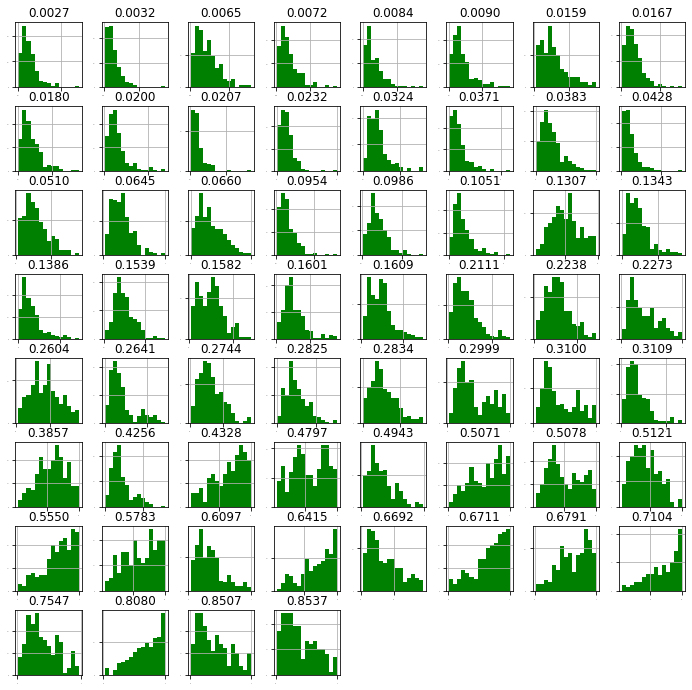

In [10]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12), bins=15, color='green')
pyplot.show()

### Mapping Categorical variables to numerical values### 

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['R']=le.fit_transform(df['R'])

### Splitting the data

In [12]:
x = df.drop(columns=['R'])
y = df[['R']]

In [13]:
x.shape,y.shape

((207, 60), (207, 1))

### Performing Principle Componenet Analysis

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=25)

In [15]:
x = pca.fit_transform(x)

In [16]:
x.shape

(207, 25)

In [17]:
data = pd.DataFrame(data=x)

### Scaling the data

In [18]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x = scale.fit_transform(x)

### Checking for null value's

In [19]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
dtype: int64

In [20]:
x = data

### Checking for skewness

In [21]:
x.skew()

0     0.182486
1     0.412060
2     0.182902
3     0.438051
4    -0.057592
5     0.283933
6     0.415527
7     0.060027
8     0.226722
9    -0.297189
10   -0.372779
11    0.466105
12    0.362252
13   -0.027891
14   -0.096266
15   -0.089723
16    0.618105
17    0.406024
18    0.003072
19    0.021691
20    0.131522
21    0.130426
22    0.674609
23    0.660835
24    0.094819
dtype: float64

In [22]:
from scipy.stats import zscore
z = np.abs(zscore(x))

In [23]:
threshold = 3
print(np.where(z>3))

(array([  1,   1,   4,   5,   6,  14,  15,  16,  18,  19,  28,  31,  32,
        43,  44,  45,  89,  90,  92,  97,  97, 134, 134, 136, 137, 138,
       141, 144, 145, 145, 163, 170], dtype=int64), array([16, 24, 17, 12, 20, 17, 13, 15, 21, 21, 17, 11, 16, 15, 18, 18, 14,
       16, 11, 23, 24, 15, 24, 21, 22, 21, 22, 24,  9, 21,  6,  7],
      dtype=int64))


In [24]:
data = df[(z<3).all(axis=1)]

In [25]:
data.shape, x.shape

((179, 61), (207, 25))

In [26]:
data=x

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

# Model Building

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.22,random_state=47)

In [30]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((161, 25), (46, 25), (161, 1), (46, 1))

In [31]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

## Linear Regression

In [32]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(train_x, train_y)
pred = lg.predict(test_x)
log = accuracy_score(test_y,pred)*100

print('accuracy score:', log)
print('\n')
print (confusion_matrix(test_y,pred))
print('\n')
print (classification_report(test_y,pred))

accuracy score: 80.43478260869566


[[18  4]
 [ 5 19]]


              precision    recall  f1-score   support

           0       0.78      0.82      0.80        22
           1       0.83      0.79      0.81        24

    accuracy                           0.80        46
   macro avg       0.80      0.80      0.80        46
weighted avg       0.81      0.80      0.80        46



### AUC_ROC Curve

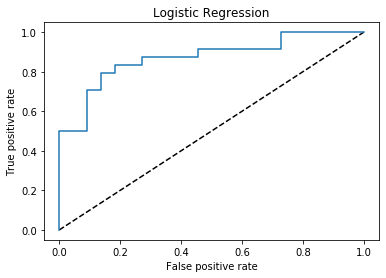

0.8049242424242423

In [33]:
y_pred_prob = lg.predict_proba(test_x)[:,1]
fpr,tpr,thresholds = roc_curve(test_y,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

auc_score = roc_auc_score(test_y,lg.predict(test_x))
auc_score

## Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x,train_y)
predgnb= gnb.predict(test_x)
gaussian = accuracy_score(test_y,predgnb)*100

print('accuracy score:',gaussian)
print('\n')
print(confusion_matrix(test_y, predgnb))
print('\n')
print(classification_report(test_y, predgnb))

accuracy score: 71.73913043478261


[[18  4]
 [ 9 15]]


              precision    recall  f1-score   support

           0       0.67      0.82      0.73        22
           1       0.79      0.62      0.70        24

    accuracy                           0.72        46
   macro avg       0.73      0.72      0.72        46
weighted avg       0.73      0.72      0.72        46



### AUC_ROC Curve

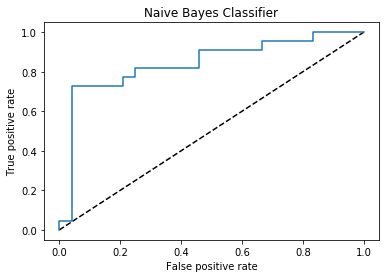

0.721590909090909

In [35]:
y_pred_prob = gnb.predict_proba(test_x)[:,0]
tpr,fpr,thresholds = roc_curve(test_y,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Naive Bayes Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Naive Bayes Classifier')
plt.show()

auc_score = roc_auc_score(test_y,gnb.predict(test_x))
auc_score

## SVC - GridSearchCV

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
from sklearn.svm import SVC
from sklearn import svm, datasets

parameters = {'kernel':['poly','rbf'],'C':[1,5,10]}
svc = SVC()
clf = GridSearchCV(svc,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'C': 5, 'kernel': 'rbf'}


In [38]:
svc=SVC(kernel='rbf', C=5, probability=True)
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
predsvc=svc.predict(test_x)
svcs = accuracy_score(test_y, predsvc)*100

print('accuracy score:',svcs)
print('\n')
print(confusion_matrix(test_y, predsvc))
print('\n')
print(classification_report(test_y, predsvc))

accuracy score: 86.95652173913044


[[19  3]
 [ 3 21]]


              precision    recall  f1-score   support

           0       0.86      0.86      0.86        22
           1       0.88      0.88      0.88        24

    accuracy                           0.87        46
   macro avg       0.87      0.87      0.87        46
weighted avg       0.87      0.87      0.87        46



### AUC_ROC Curve

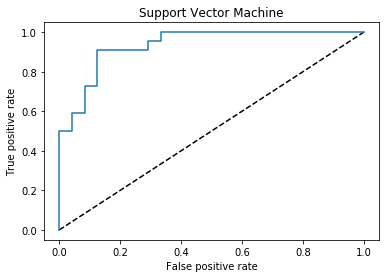

0.8693181818181819

In [39]:
y_pred_prob = svc.predict_proba(test_x)[:,0]
tpr,fpr,thresholds = roc_curve(test_y,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Support Vector Machine')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Support Vector Machine')
plt.show()

auc_score = roc_auc_score(test_y,svc.predict(test_x))
auc_score

## DecisionTree - GridSearchCV

In [40]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'criterion':['gini','entropy']}
dtc =DecisionTreeClassifier()
clf = GridSearchCV(dtc,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'criterion': 'entropy'}


In [41]:
dtc =DecisionTreeClassifier(criterion='entropy')
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
preddtc=dtc.predict(test_x)
decision_e = accuracy_score(test_y, preddtc)*100

print('accuracy score:',decision_e )
print('\n')
print(confusion_matrix(test_y, preddtc))
print('\n')
print(classification_report(test_y, preddtc))

accuracy score: 60.86956521739131


[[17  5]
 [13 11]]


              precision    recall  f1-score   support

           0       0.57      0.77      0.65        22
           1       0.69      0.46      0.55        24

    accuracy                           0.61        46
   macro avg       0.63      0.62      0.60        46
weighted avg       0.63      0.61      0.60        46



### AUC_ROC Curve

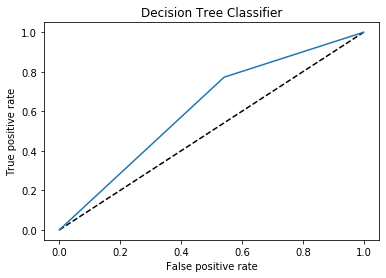

0.615530303030303

In [42]:
y_pred_prob = dtc.predict_proba(test_x)[:,0]
tpr,fpr,thresholds = roc_curve(test_y,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision tree classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()

auc_score = roc_auc_score(test_y,dtc.predict(test_x))
auc_score

## Random Forest - GridSearchCV

In [43]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators':[100,300,500],'random_state': [40,45,50,55,60,65,70,75]}
rf = RandomForestClassifier()
clf = GridSearchCV(rf,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'n_estimators': 100, 'random_state': 75}


In [44]:
rf = RandomForestClassifier(n_estimators=100,random_state=75) 
rf.fit(train_x,train_y)
predrf = rf.predict(test_x)
random = accuracy_score(test_y,predrf)*100

print('accuracy score:',random)
print('\n')
print(confusion_matrix(test_y,predrf))
print(classification_report(test_y,predrf))

accuracy score: 80.43478260869566


[[20  2]
 [ 7 17]]
              precision    recall  f1-score   support

           0       0.74      0.91      0.82        22
           1       0.89      0.71      0.79        24

    accuracy                           0.80        46
   macro avg       0.82      0.81      0.80        46
weighted avg       0.82      0.80      0.80        46



### AUC_ROC Curve

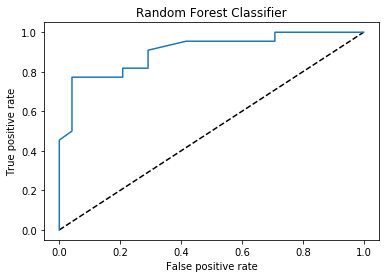

0.8087121212121213

In [45]:
y_pred_prob = rf.predict_proba(test_x)[:,0]
tpr,fpr,thresholds = roc_curve(test_y,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier')
plt.show()

auc_score = roc_auc_score(test_y,rf.predict(test_x))
auc_score

## KNN - GridSearchCV

In [46]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors': [5,10,15,20,25,30]}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'n_neighbors': 5}


In [47]:
knn = KNeighborsClassifier(n_neighbors =5)
knn.fit(train_x,train_y)
knn.score(train_x,train_y)
predknn = knn.predict(test_x)
knn_a = accuracy_score(test_y, predknn)*100

print('accuracy score:',knn_a)
print('\n')
print(confusion_matrix(test_y, predknn))
print('\n')
print(classification_report(test_y, predknn))

accuracy score: 65.21739130434783


[[20  2]
 [14 10]]


              precision    recall  f1-score   support

           0       0.59      0.91      0.71        22
           1       0.83      0.42      0.56        24

    accuracy                           0.65        46
   macro avg       0.71      0.66      0.63        46
weighted avg       0.72      0.65      0.63        46



### AUC_ROC Curve

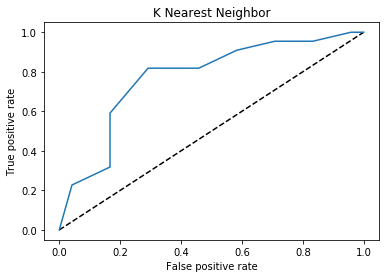

0.6628787878787878

In [48]:
y_pred_prob = knn.predict_proba(test_x)[:,0]
tpr,fpr,thresholds = roc_curve(test_y,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='K Nearest Neighbor')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('K Nearest Neighbor')
plt.show()

auc_score = roc_auc_score(test_y,knn.predict(test_x))
auc_score

### Picking the best Model

In [49]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', ' Gaussian Naive Bayes',
              'Decision Tree'],
    'Score': [svcs,knn_a,log,random,gaussian,decision_e]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,86.956522
2,Logistic Regression,80.434783
3,Random Forest,80.434783
4,Gaussian Naive Bayes,71.739130
1,KNN,65.217391
5,Decision Tree,60.869565


## Saving the best model

In [50]:
import pickle

filename = 'sonar_pred.pkl'
pickle.dump(random, open(filename, 'wb'))